<a href="https://colab.research.google.com/github/hiitsmocha/learn-pytorch/blob/main/simple_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import numpy as np

In [2]:
import torch.nn as nn
import torch.nn.functional as F

In [3]:
# Create a Model Class that inherits nn.Module

In [4]:
class Model(nn.Module):
  # Input layer (4 features of the flower) --> Hidden layer1 (number of neurons) --> H2 (n)
  # --> Output (3 classes of iris flowers)
  def __init__(self, in_features = 4, h1 = 8, h2 = 9, out_features = 3):
    super().__init__() # instantiate our nn.Module
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)
    return x

In [5]:
# Pick a manual seed for randomization
torch.manual_seed(41)
# create an instance of model
model = Model()

In [6]:
# Load data and train model (as CSV file)
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [7]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_df = pd.read_csv(url)


In [8]:
my_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [9]:
my_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [10]:
my_df['species'] = my_df['species'].replace('setosa', 0.0)
my_df['species'] = my_df['species'].replace('versicolor', 1.0)
my_df['species'] = my_df['species'].replace('virginica', 2.0)
my_df

<ipython-input-10-31d2ab34cca2>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['species'] = my_df['species'].replace('virginica', 2.0)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [11]:
# Train Test Split! Set X, y
X = my_df.drop('species', axis = 1)
y = my_df['species']

In [12]:
# Convert these to numpy arrays
X = X.values
y = y.values

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 41)

In [15]:
# Convert X features to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
# Convert y lables to tensors long
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [16]:
# Set the criterion of model to measure the error, how far off the predicitons are from the results
criterion = nn.CrossEntropyLoss()
# Choose Adam Optimizer, lr = learning rate(if error doesnt go down after a bunch of iterations(epochs))
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

In [17]:
# Train our model!
# Epochs? (one run through all the training data in our network)
epochs = 100
losses = []
for i in range(epochs):
  # Go forward and get a prediction
  y_pred = model.forward(X_train) # Get predicted results
  # Measure the loss/error, gonna be high at first
  loss = criterion(y_pred, y_train) # predicted values vs the y_train

  # Keep track of our losses
  losses.append(loss.detach().numpy())

  # Print very 10 epochs
  if i % 10 == 0:
    print(f"Epoch: {i} and loss: {loss}")

  # Do some back propagation: take the error rate of forward propagationa and feed it back through the network
  # to fine tune the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0 and loss: 1.1251550912857056
Epoch: 10 and loss: 1.0096259117126465
Epoch: 20 and loss: 0.8157405853271484
Epoch: 30 and loss: 0.585706353187561
Epoch: 40 and loss: 0.3999636471271515
Epoch: 50 and loss: 0.2676880657672882
Epoch: 60 and loss: 0.17942363023757935
Epoch: 70 and loss: 0.12151690572500229
Epoch: 80 and loss: 0.0860118418931961
Epoch: 90 and loss: 0.06520850956439972


Text(0.5, 0, 'Epoch')

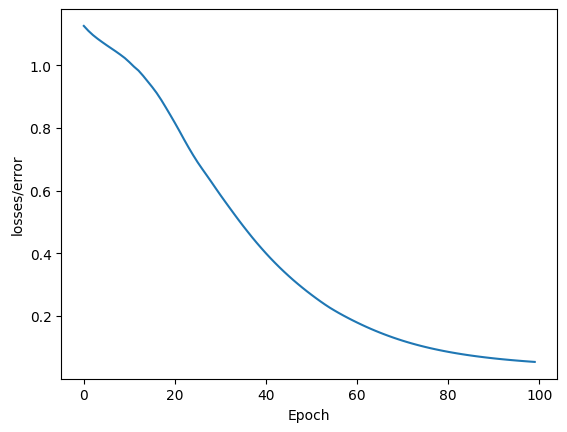

In [18]:
# Graph it out
plt.plot(range(epochs), losses)
plt.ylabel('losses/error')
plt.xlabel('Epoch')